In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from functions_Rosa import * 

In [2]:
df_final_demo = read_txt('../data/raw/df_final_demo.txt')
df_final_demo.head(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0


In [3]:
data_exploration(df_final_demo)

Number of rows: 70609
Number of columns: 9
Number of duplicates: 0

Numerical Columns: Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

Categorical Columns: Index(['gendr'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,clnt_tenure_yr,float64,70595,14,54
2,clnt_tenure_mnth,float64,70595,14,482
3,clnt_age,float64,70594,15,165
4,gendr,object,70595,14,4
5,num_accts,float64,70595,14,8
6,bal,float64,70595,14,70328
7,calls_6_mnth,float64,70595,14,8
8,logons_6_mnth,float64,70595,14,9


In [4]:
rename_columns = {
    "clnt_tenure_yr" : "tenure_year",
    "clnt_tenure_mnth": "tenure_month",
    "clnt_age": "age",
    "gendr" : "gender",
    "num_accts": "number_of_accounts",
    "bal" : "balance",
    "calls_6_mnth": "calls_6_month",
    "logons_6_mnth": "logons_6_month"
}

df_final_demo = df_final_demo.rename(columns = rename_columns)
df_final_demo

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [5]:
df_final_experiment_clients = read_txt('../data/raw/df_final_experiment_clients.txt')
df_final_experiment_clients = df_final_experiment_clients.rename(columns = {"Variation":"variation"})
df_final_experiment_clients.head(3)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [6]:
data_exploration(df_final_experiment_clients)

Number of rows: 70609
Number of columns: 2
Number of duplicates: 0

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['variation'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,variation,object,50500,20109,2


In [7]:
df_final_experiment_clients['variation'].unique()

array(['Test', 'Control', nan], dtype=object)

In [8]:
# Drop missing value in variation

df_final_experiment_clients.dropna(subset=["variation"], inplace=True)


Control Group = Clients interacted with Vanguard’s traditional online process.<br>
Test Group = Clients experienced the new, spruced-up digital interface.

In [9]:
df_final_web_data_pt_1 = read_txt('../data/raw/df_final_web_data_pt_1.txt')
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [10]:
data_exploration(df_final_web_data_pt_1)

Number of rows: 343141
Number of columns: 5
Number of duplicates: 2095

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,343141,0,58391
1,visitor_id,object,343141,0,62936
2,visit_id,object,343141,0,75256
3,process_step,object,343141,0,5
4,date_time,object,343141,0,282666


In [11]:
df_final_web_data_pt_2 = read_txt('../data/raw/df_final_web_data_pt_2.txt')
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [12]:
data_exploration(df_final_web_data_pt_2)

Number of rows: 412264
Number of columns: 5
Number of duplicates: 8669

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,412264,0,67430
1,visitor_id,object,412264,0,71042
2,visit_id,object,412264,0,82841
3,process_step,object,412264,0,5
4,date_time,object,412264,0,346697


### Merge Digital Footprints data

In [13]:
"Concat two dataframe in vertical mode"

df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis=0)

In [14]:
df_final_web_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


## Data Cleaning

In [15]:
df_final_web_data.duplicated().sum()

10764

In [16]:
df_final_web_data = df_final_web_data.drop_duplicates()

In [17]:
df_final_web_data.duplicated().sum()

0

### Filling missing numerical data in df_final_demo with ‘mean’ and categorical_data with ‘mode’

In [18]:
# Select categorical and numerical columns
categorical_data = df_final_demo.select_dtypes(include=['object']).columns
numerical_data = df_final_demo.select_dtypes(include=['int64','float64']).columns

# Fill missing values in numerical columns with the mean
for column in numerical_data:
    df_final_demo[column] = df_final_demo[column].fillna(df_final_demo[column].mean())

# Fill missing values in categorical columns with the mode
for column in categorical_data:
    if not df_final_demo[column].mode().empty:  # Check if mode exists
        df_final_demo[column] = df_final_demo[column].fillna(df_final_demo[column].mode()[0])

In [19]:
# Check missing values

df_final_demo.isnull().sum()

client_id             0
tenure_year           0
tenure_month          0
age                   0
gender                0
number_of_accounts    0
balance               0
calls_6_month         0
logons_6_month        0
dtype: int64

### Change data type of number_of_accounts, calls_6_month, and logons_6_month into integer


In [23]:
df_final_demo["number_of_accounts"] = df_final_demo["number_of_accounts"].astype("int64")
df_final_demo["calls_6_month"] = df_final_demo["calls_6_month"].astype("int64")
df_final_demo["logons_6_month"] = df_final_demo["logons_6_month"].astype("int64")

In [24]:
df_final_demo.dtypes

client_id               int64
tenure_year           float64
tenure_month          float64
age                   float64
gender                 object
number_of_accounts      int64
balance               float64
calls_6_month           int64
logons_6_month          int64
dtype: object

### Drop missing values in df_final_experiment_clients

In [25]:
df_final_experiment_clients = df_final_experiment_clients.dropna()

In [26]:
# Recheck missing values
df_final_experiment_clients.isnull().sum()

client_id    0
variation    0
dtype: int64

In [29]:
df_final_demo["logons_6_month"]

0        9
1        9
2        9
3        6
4        3
        ..
70604    5
70605    6
70606    3
70607    4
70608    7
Name: logons_6_month, Length: 70609, dtype: int64

## Export the clean dataframes as new csv files

In [27]:
df_final_demo.to_csv('../data/cleaned/df_final_demo_cleaned.csv', index=False)
df_final_experiment_clients.to_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv', index=False)
df_final_web_data.to_csv('../data/cleaned/df_final_web_data_cleaned.csv', index=False)

# Analysis: Primary clients who use the online process

In [48]:
df_final_demo_cleaned = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_final_experiment_clients_cleaned = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_final_web_data_cleaned = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')

## 1. Univariate analysis

### 1.1. Categorical

In [60]:
def univariate_categorical(df):

    # check the frequency 
    frequency_table = df.value_counts()

    # visualization
    
    sns.barplot(x=frequency_table.index, y=frequency_table.values, palette='viridis')
    plt.title('Visualization of The Distribution')
    plt.xticks(ha='right')
    plt.show()

#### Gender

In [61]:
df_final_demo_cleaned["gender"].value_counts()

gender
U    24136
M    23724
F    22746
X        3
Name: count, dtype: int64

U = unknown/unspecified --> it could be that the user doesn't want to disclose the gender. <br>
X = non-binary or other genders that don't conform to the traditional male/female binary

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4452\1922417502.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette='viridis')


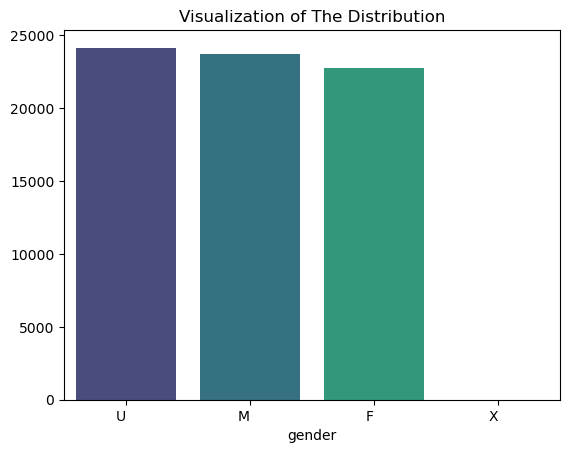

In [62]:
gender = df_final_demo_cleaned["gender"]
univariate_categorical(gender)

### 1.2. Numerical

#### Age

In [63]:
def univariate_numerical(df):

    # Measure of centrality
    mean = round(df.mean(),2)
    median = round(df.median(),2)
    mode = round(df.mode()[0],2)

    # Measure of dispersion
    variance = round(df.var(),2)
    std_dev = round(df.std(),2)
    min_value = df.min()
    max_value = df.max()
    range_value = max_value - min_value
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    quantiles = df.quantile([0.25, 0.5, 0.75])

    # skewness and kurtosis
    skewness = round(df.skew(),2)
    kurtosis = round(df.kurtosis(),2)

    summary_df = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation', 'Min Value', 'Max Value', 'Range', 'Interquartile Range', 'Skewness', 'Kurtosis'],
        'Value': [mean, median, mode, variance, std_dev, min_value, max_value, range_value, IQR, skewness, kurtosis]
    })


    # Visualization

    # Histogram plot
    plt.subplot(2, 1, 1)
    sns.histplot(df, kde=True, bins=20, color="skyblue")
    plt.title('Histogram plot')

    # Box plot
    plt.subplot(2, 1, 2)
    sns.boxplot(data = df, color="skyblue")
    plt.title('Box Plot')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots

    plt.show()
    
    return summary_df

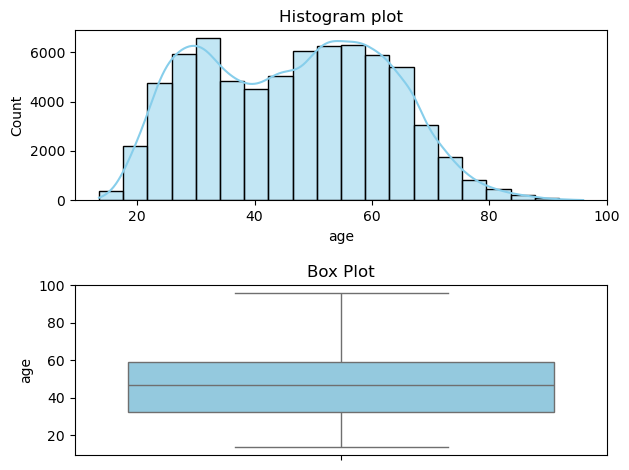

,Metric,Value
0,Mean,46.44
1,Median,47.00
2,Mode,58.50
3,Variance,243.04
4,Standard Deviation,15.59
5,Min Value,13.50
6,Max Value,96.00
7,Range,82.50
8,Interquartile Range,26.50
9,Skewness,0.08


In [68]:
age = df_final_demo_cleaned["age"]
univariate_numerical(age)

#### Tenure year

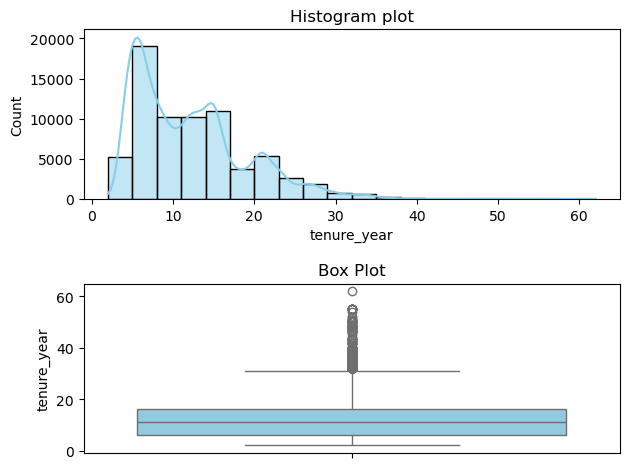

,Metric,Value
0,Mean,12.05
1,Median,11.00
2,Mode,6.00
3,Variance,47.21
4,Standard Deviation,6.87
5,Min Value,2.00
6,Max Value,62.00
7,Range,60.00
8,Interquartile Range,10.00
9,Skewness,1.04


In [67]:
tenure_year = df_final_demo_cleaned["tenure_year"]
univariate_numerical(tenure_year)

In [69]:
# Discretizing 'age' into 4 categories
bins = [12, 19, 39, 59, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Seniors']
df_final_demo_cleaned['age_group'] = pd.cut(df_final_demo_cleaned['age'], bins=bins, labels=labels, include_lowest=True)

df_final_demo_cleaned

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,age_group
0,836976,6.0,73.0,60.5,U,0,45105.30,0,0,Seniors
1,2304905,7.0,94.0,58.0,U,0,110860.30,0,0,Adults
2,1439522,5.0,64.0,32.0,U,0,52467.79,0,0,Young Adults
3,1562045,16.0,198.0,49.0,M,0,67454.65,0,0,Adults
4,5126305,12.0,145.0,33.0,F,0,103671.75,0,0,Young Adults
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,0,1411062.68,0,0,Young Adults
70605,8981690,12.0,148.0,31.0,M,0,101867.07,0,0,Young Adults
70606,333913,16.0,198.0,61.5,F,0,40745.00,0,0,Seniors
70607,1573142,21.0,255.0,68.0,M,0,475114.69,0,0,Seniors


In [ ]:
df_final_demo["age_group"].value_counts()

age_group
Adults          27770
Young Adults    24842
Seniors         17026
Teenagers         956
Name: count, dtype: int64

The primary clients are adults, followed by young adults, seniors, and teenagers.

#### 3. New vs loyal clients

In [ ]:
df_final_demo.dtypes # client_id should be string?

client_id           int64
tenure_year       float64
tenure_month      float64
age               float64
gender             object
num_accts         float64
bal               float64
calls_6_mnth      float64
logons_6_mnth     float64
age_group        category
dtype: object

In [ ]:
df_final_demo["tenure_year"].value_counts

<bound method IndexOpsMixin.value_counts of 0         6.0
1         7.0
2         5.0
3        16.0
4        12.0
         ... 
70604     4.0
70605    12.0
70606    16.0
70607    21.0
70608    21.0
Name: tenure_year, Length: 70609, dtype: float64>

In [ ]:
# group client based on tenure year

tenure_group = df_final_demo.groupby("tenure_year")["client_id"].count().sort_values(ascending = False)

tenure_group

tenure_year
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
42.0       6
43.0       6
47.0       6
51.0       5
46.0       5
49.0       4
44.0       3
52.0       2
45.0       1
54.0       1
41.0       1
62.0       1
Name: client_id, dtype: int64

In [ ]:
df_final_demo["tenure_year"].max()

62.0

In [ ]:
tenure_group_df = tenure_group.reset_index()

tenure_group_df.columns = ["tenure_year", "number_of_clients"]

tenure_group_df.head()

,tenure_year,number_of_clients
0,6.0,7092
1,5.0,6955
2,7.0,4955
3,4.0,4687
4,15.0,4564


In [ ]:

sns.barplot(data=tenure_group_df, x='tenure_year', y='number_of_clients', color='lightblue')
plt.xlabel('Tenure Year')
plt.ylabel('Number of Clients')
plt.show()

In [ ]:



fig = px.bar(tenure_group_df, y='number_of_clients', x='tenure_year', text_auto='.2s',
            title="Client's Tenure Year")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed